In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

In [22]:
pickle_path=r'.\pickles\altDATA_E4-E5_1000.pickle'

## Deserializing the pickle
with open(pickle_path, 'rb') as file:
    showers = pickle.load(file)


## Particle count vs multiplicity

In [ ]:
##PARTE DE FRANCISCO
det0_list=[]
detA_list=[]
detB_list=[]
detC_list=[]

for shower in showers:
    detA_df,detB_df,detC_df,det0_df=shower[1:]
    det0_list.append(len(det0_df))
    detA_list.append(len(detA_df))
    detB_list.append(len(detB_df))
    detC_list.append(len(detC_df))

det0_unique_counts=list(set(det0_list))
detA_unique_counts=list(set(detA_list))
detB_unique_counts=list(set(detB_list))
detC_unique_counts=list(set(detC_list))

det0_showers_with_that_count=[]
detA_showers_with_that_count=[]
detB_showers_with_that_count=[]
detC_showers_with_that_count=[]

for det0_count in det0_unique_counts:
    det0_showers_with_that_count.append(det0_list.count(det0_count))
for detA_count in detA_unique_counts:
    detA_showers_with_that_count.append(detA_list.count(detA_count))
for detB_count in detB_unique_counts:
    detB_showers_with_that_count.append(detB_list.count(detB_count))
for detC_count in detC_unique_counts:
    detC_showers_with_that_count.append(detC_list.count(detC_count))

##     in the end, we have
#det0_unique_counts
#det0_showers_with_that_count
#detA_unique_counts
#detA_showers_with_that_count
#detB_unique_counts
#detB_showers_with_that_count
#detC_unique_counts
#detC_showers_with_that_count

##PARTE DE JD



#plt.plot(det0_unique_counts, det0_showers_with_that_count, color='black',linestyle='--', label= "Detector 0") 
plt.plot(detA_unique_counts, detA_showers_with_that_count, color='red',linestyle='-', label= "Detector A") 
plt.plot(detB_unique_counts, detB_showers_with_that_count, color='blue',linestyle='--', label= "Detector B") 
plt.plot(detC_unique_counts, detC_showers_with_that_count, color='green',linestyle='--', label= "Detector C") 

plt.title('Conteo de particulas en todos los detectores vs Multiplicidad del conteo')
plt.xlabel('Conteo de particulas') 
plt.ylabel('Multiplicidad (Escala logaritmica)') 
plt.yscale('log')
#plt.xlim(0, 30)
plt.legend()
plt.grid(True) 

# Mostrar la gráfica.
plt.show()

In [ ]:
plt.plot(det0_unique_counts, det0_showers_with_that_count, color='black', label= "Detector 0") 

plt.title('Conteo de particulas en todos los detectores vs Multiplicidad del conteo')
plt.xlabel('Conteo de particulas') 
plt.ylabel('Multiplicidad (Escala logaritmica)') 
plt.yscale('log')
plt.xlim(0, 30)
plt.legend()
plt.grid(True) 

# Mostrar la gráfica.
plt.show()

## Particle count vs primary energy

In [20]:
##PARTE DE FIORELLA
E_list=[]
Part_count_list=[]

for lluvia in showers:
    diccionario=lluvia[0]
    df1=lluvia[1]
    df2=lluvia[2]
    df3=lluvia[3]
    df0=lluvia[4]
    energia=diccionario["PRME"]
    A1=len(df1)
    A2=len(df2)
    A3=len(df3)
    A0=len(df0)
    Part_count= A1+A2+A3+A0
    Part_count_list.append(Part_count)
    E_list.append(energia)

##PARTE DE JP

energy_x = np.asarray(E_list)      #convierte a array par chambear light
slope, intercept, r_val, p_val, std_err = linregress(energy_x, Part_count_list)
trend_line = slope * energy_x + intercept

plt.scatter(energy_x, Part_count_list, color='red') 
plt.title('Conteo de particulas en todos los detectores vs Energía primaria')
plt.plot(energy_x, trend_line, color='lightblue', label=f'Tendencia: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_val**2:.4f}')
plt.xlabel('Energía') 
plt.ylabel('Conteo de partículas') 
plt.legend()
plt.grid(True) 
plt.show() 

IndexError: tuple index out of range

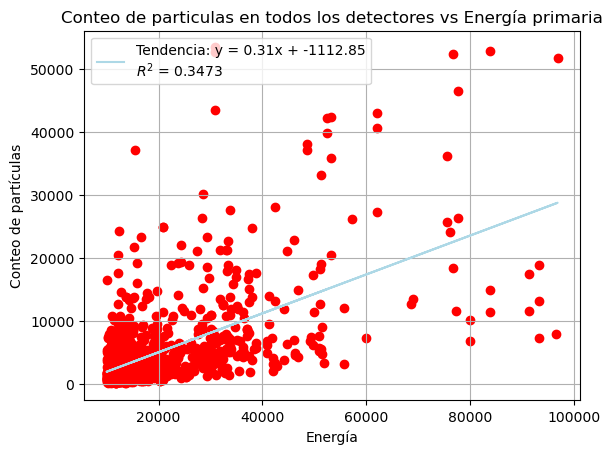

In [23]:
#### ALTERNATIVE, only det1

##PARTE DE FIORELLA
E_list=[]
Part_count_list=[]

for lluvia in showers:
    diccionario=lluvia[0]
    df1=lluvia[1]

    energia=diccionario["PRME"]
    A1=len(df1)

    Part_count= A1
    Part_count_list.append(Part_count)
    E_list.append(energia)

##PARTE DE JP

energy_x = np.asarray(E_list)      #convierte a array par chambear light
slope, intercept, r_val, p_val, std_err = linregress(energy_x, Part_count_list)
trend_line = slope * energy_x + intercept

plt.scatter(energy_x, Part_count_list, color='red') 
plt.title('Conteo de particulas en todos los detectores vs Energía primaria')
plt.plot(energy_x, trend_line, color='lightblue', label=f'Tendencia: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_val**2:.4f}')
plt.xlabel('Energía') 
plt.ylabel('Conteo de partículas') 
plt.legend()
plt.grid(True) 
plt.show() 

## Histogram particle count

In [ ]:
def count_particles(shower_summary,central_det=True):
    diccionario=shower_summary[0]
    df1=shower_summary[1]
    df2=shower_summary[2]
    df3=shower_summary[3]
    energy=diccionario["PRME"]
    A1=len(df1)
    A2=len(df2)
    A3=len(df3)
    part_count= A1+A2+A3
    if central_det:
        df0=shower_summary[4]
        A0=len(df0)
        part_count=part_count + A0
    return energy,part_count

In [ ]:
e_list=[]
count_list=[]
for shower in showers:
    energy,part_count= count_particles(shower,central_det=True)
    e_list.append[energy]
    count_list.append[part_count]

e_unique=list(set(e_list))
for energy in e_unique:
    
    